# Political Violence Targeting Women & Demonstrations Featuring Women

#### All violence targeting women, as well as demonstrations featuring women, are included in the data file below. The data in this file cover all events in which women were specifically targeted by political violence, not all events involving women in any way; the file also covers all demonstration events in which women were specifically featured, not all demonstrations involving women. 

#### This dataset was extract from ACLED Access Portal and we perform EDA using Python.


## Data Collection & Data Exploration

We import pandas and necessary libraries for dataframe manipulation and analysis.

In [28]:
# Libraries are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date


In [29]:
# Dataset is downloaded
df_gpv = pd.read_csv("gender_Sep27-1.csv")
df_gpv.drop([
    'event_id_cnty',
    #'event_date', 
    'year', 
    'time_precision',
    'disorder_type', 
    #'event_type', 
    #'sub_event_type', 
    'actor1',
    'assoc_actor_1', 
    #'inter1', 
    'actor2', 
    'assoc_actor_2', 
    'inter2',
    #'interaction', 
    'civilian_targeting', 
    #'iso',
    #'region', 
    #'country',
    'admin1', 
    'admin2', 
    'admin3', 
    #'location', 
    'latitude', 
    'longitude',
    'geo_precision', 
    'source', 
    'source_scale', 
    #'notes', 
    #'fatalities',
    'tags',
    'timestamp'                           
], axis=1, inplace=True)


df_gpv["date"] = df_gpv["event_date"].apply(date.fromisoformat)

display(df_gpv.shape)

(75563, 12)

#### Exploring attributes of date.time

In [30]:
df_gpv['date'][0]

datetime.date(2024, 9, 27)

In [31]:
df_gpv['date'][0].year

2024

In [32]:
df_gpv['date'][0].month

9

In [33]:
df_gpv['date'][0].day

27

#### Exploring the dataset

In [34]:
# First rows are checked

display(df_gpv.head(2))

,event_date,event_type,sub_event_type,inter1,interaction,iso,region,country,location,notes,fatalities,date
0,2024-09-27,Violence against civilians,Sexual violence,Political militia,Political militia-Civilians,76,South America,Brazil,Sorriso,"On 27 September 2024, in Sorriso (Mato Grosso)...",0,2024-09-27
1,2024-09-27,Violence against civilians,Attack,Political militia,Political militia-Civilians,218,South America,Ecuador,Guayaquil,"Around 27 September 2024 (as reported), in Gua...",1,2024-09-27


In [35]:
# Last five rows are checking

display(df_gpv.tail(2))

,event_date,event_type,sub_event_type,inter1,interaction,iso,region,country,location,notes,fatalities,date
75561,1997-01-15,Violence against civilians,Attack,Political militia,Political militia-Civilians,646,Eastern Africa,Rwanda,Ruhengeri,"Around 15 January 1997 (month of), 3 spanish a...",3,1997-01-15
75562,1997-01-06,Violence against civilians,Attack,Identity militia,Identity militia-Civilians,562,Western Africa,Niger,Niamey,A french woman was shot and killed by Tuareg r...,1,1997-01-06


In [36]:
# Columns's names are checked

display(df_gpv.keys())

Index(['event_date', 'event_type', 'sub_event_type', 'inter1', 'interaction',
       'iso', 'region', 'country', 'location', 'notes', 'fatalities', 'date'],
      dtype='object')

In [37]:
# Structural Overview of the DataFrame

df_gpv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75563 entries, 0 to 75562
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   event_date      75563 non-null  object
 1   event_type      75563 non-null  object
 2   sub_event_type  75563 non-null  object
 3   inter1          75563 non-null  object
 4   interaction     75563 non-null  object
 5   iso             75563 non-null  int64 
 6   region          75563 non-null  object
 7   country         75563 non-null  object
 8   location        75563 non-null  object
 9   notes           75563 non-null  object
 10  fatalities      75563 non-null  int64 
 11  date            75563 non-null  object
dtypes: int64(2), object(10)
memory usage: 6.9+ MB


In [38]:
# Basic statistical description (numerical columns)

df_gpv.describe()

,iso,fatalities
count,75563.000000,75563.000000
mean,457.337401,0.255323
std,251.661696,4.010021
min,0.000000,0.000000
25%,276.000000,0.000000
50%,410.000000,0.000000
75%,710.000000,0.000000
max,894.000000,750.000000


In [39]:
# Displaying random column
df_gpv['inter1']

0        Political militia
1        Political militia
2        Political militia
3        Political militia
4             State forces
               ...        
75558          Rebel group
75559          Rebel group
75560          Rebel group
75561    Political militia
75562     Identity militia
Name: inter1, Length: 75563, dtype: object

#### Checking unique values

In [40]:
df_gpv['region'].unique()

array(['South America', 'North America', 'Middle East', 'Southern Africa',
       'Europe', 'East Asia', 'South Asia', 'Northern Africa',
       'Western Africa', 'Middle Africa', 'Central America',
       'Caucasus and Central Asia', 'Southeast Asia', 'Eastern Africa',
       'Caribbean', 'Oceania'], dtype=object)

In [41]:
df_gpv['event_type'].unique()

array(['Violence against civilians', 'Protests', 'Riots',
       'Strategic developments', 'Explosions/Remote violence'],
      dtype=object)

In [42]:
df_gpv['inter1'].unique()


array(['Political militia', 'State forces', 'Protesters', 'Rioters',
       'Identity militia', 'External/Other forces', 'Rebel group',
       'Civilians'], dtype=object)

In [43]:
df_gpv['interaction'].unique()

array(['Political militia-Civilians', 'State forces-Civilians',
       'Protesters only', 'Rioters-Civilians',
       'Identity militia-Civilians', 'External/Other forces-Civilians',
       'Rebel group-Civilians', 'State forces-Protesters',
       'State forces-Rioters', 'Rioters only', 'Protesters-Protesters',
       'Rebel group-Protesters', 'Civilians only', 'Rioters-Protesters',
       'Rioters-Rioters', 'Political militia-Protesters',
       'Civilians-Civilians', 'Protesters-External/Other forces',
       'Identity militia only', 'Rioters-External/Other forces',
       'Political militia-Rioters', 'Rebel group-Rioters',
       'Identity militia-Protesters'], dtype=object)

In [44]:
df_gpv['sub_event_type'].unique()

array(['Sexual violence', 'Attack', 'Abduction/forced disappearance',
       'Peaceful protest', 'Mob violence', 'Protest with intervention',
       'Violent demonstration', 'Arrests', 'Looting/property destruction',
       'Other', 'Excessive force against protesters', 'Grenade',
       'Remote explosive/landmine/IED',
       'Shelling/artillery/missile attack', 'Disrupted weapons use',
       'Air/drone strike', 'Suicide bomb'], dtype=object)

#### Handling missing data

In [45]:
# Missing values are identifying

df_gpv.isnull().sum()

event_date        0
event_type        0
sub_event_type    0
inter1            0
interaction       0
iso               0
region            0
country           0
location          0
notes             0
fatalities        0
date              0
dtype: int64

## Pre-processing data

In [48]:
df_gpv[df_gpv['fatalities']== 750].iloc[0]['notes']

'On 18 August 2011, Murle militia attacked the town of Pieri (Uror county, Jonglei state), killing at least 750 Lou Nuer residents. Nearly 1,000 were wounded, and dozens of women as well as children were abducted. 38,000 head of cattle were allegedly stolen.'

In [52]:
df_gpv['region'].unique()

array(['South America', 'North America', 'Middle East', 'Southern Africa',
       'Europe', 'East Asia', 'South Asia', 'Northern Africa',
       'Western Africa', 'Middle Africa', 'Central America',
       'Caucasus and Central Asia', 'Southeast Asia', 'Eastern Africa',
       'Caribbean', 'Oceania'], dtype=object)

In [61]:
region_map = {
    'africa': ['Southern Africa', 'Northern Africa', 'Middle Africa', 'Western Africa', 'Eastern Africa'],
    'middle east': ['Middle East'],
    'asia':['Caucasus and Central Asia', 'Sotheast Asia', 'South Asia', 'East Asia'],
    'america and caribbean' :[ 'South America', 'North America', 'Central America', 'Caribbean'],
    'europe': ['Europe'],
    'oceania': ['Oceania']
}


In [62]:
# Flatten the mapping to map each element to its group
flattened_map = {item: key for key, values in region_map.items() for item in values}


In [64]:
new_column = {'region': ['america', 'middle east', 'asia', 'america and caribbean', 'europe', 'oceania']}
df = pd.DataFrame(new_column)

df_gpv['region_formatted'] = df_gpv['region'].map(flattened_map)

display(df_gpv)

,event_date,event_type,sub_event_type,inter1,interaction,iso,region,country,location,notes,fatalities,date,region_formatted
0,2024-09-27,Violence against civilians,Sexual violence,Political militia,Political militia-Civilians,76,South America,Brazil,Sorriso,"On 27 September 2024, in Sorriso (Mato Grosso)...",0,2024-09-27,america and caribbean
1,2024-09-27,Violence against civilians,Attack,Political militia,Political militia-Civilians,218,South America,Ecuador,Guayaquil,"Around 27 September 2024 (as reported), in Gua...",1,2024-09-27,america and caribbean
2,2024-09-27,Violence against civilians,Abduction/forced disappearance,Political militia,Political militia-Civilians,484,North America,Mexico,Tijuana,"Around 27 September 2024 (as reported), in Tij...",0,2024-09-27,america and caribbean
3,2024-09-27,Violence against civilians,Attack,Political militia,Political militia-Civilians,484,North America,Mexico,Ciudad de Mexico - Gustavo A. Madero,"On 27 September 2024, in Ciudad de Mexico - Gu...",1,2024-09-27,america and caribbean
4,2024-09-27,Violence against civilians,Attack,State forces,State forces-Civilians,887,Middle East,Yemen,Al Yahari,"On 27 September 2024, a Houthi-affiliated fema...",0,2024-09-27,middle east
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75558,1997-03-05,Violence against civilians,Attack,Rebel group,Rebel group-Civilians,800,Eastern Africa,Uganda,Palabek,After failing to find deserters they captured ...,9,1997-03-05,africa
75559,1997-02-24,Violence against civilians,Attack,Rebel group,Rebel group-Civilians,12,Northern Africa,Algeria,Berrouaghia,24 March: 5 young girls were killed in Berroua...,5,1997-02-24,africa
75560,1997-01-22,Violence against civilians,Sexual violence,Rebel group,Rebel group-Civilians,694,Western Africa,Sierra Leone,Magburaka,Week of 22 January. RUF forces attacked civili...,40,1997-01-22,africa
75561,1997-01-15,Violence against civilians,Attack,Political militia,Political militia-Civilians,646,Eastern Africa,Rwanda,Ruhengeri,"Around 15 January 1997 (month of), 3 spanish a...",3,1997-01-15,africa


In [ ]:
#'region' is not overwritten in the dataframe, why?

## Plotting data

#### Region vs Fatalities

In [65]:
df_gpv['region_formatted'].unique()

array(['america and caribbean', 'middle east', 'africa', 'europe', 'asia',
       nan, 'oceania'], dtype=object)

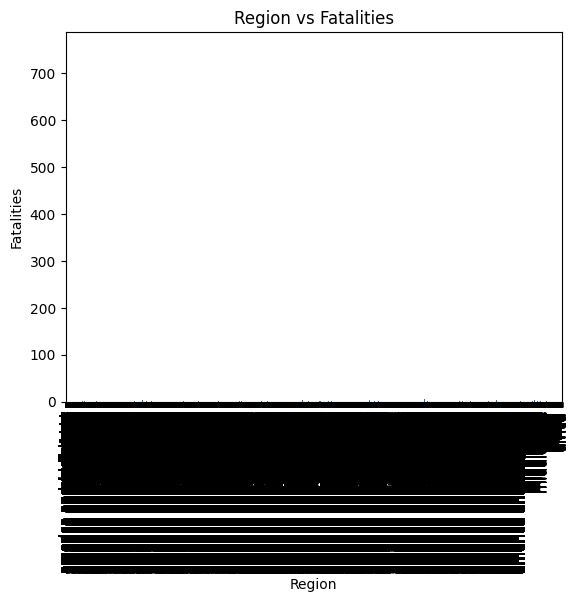

In [66]:
df_gpv.plot(kind='bar', x='region_formatted', y='fatalities', legend=False)

plt.title('Region vs Fatalities')
plt.xlabel('Region')
plt.ylabel('Fatalities')
plt.show()


#### Country vs Sub_type

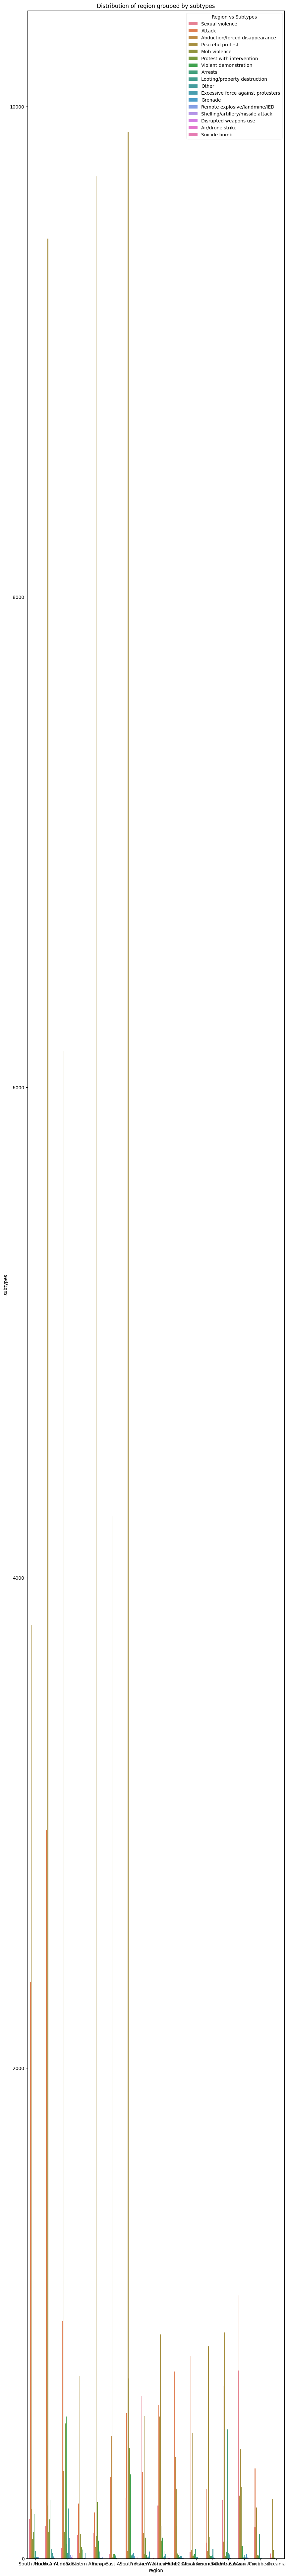

In [71]:
plt.figure(figsize=(10, 100))
sns.countplot(data=df_gpv, x='region', hue='sub_event_type')
plt.title('Distribution of region grouped by subtypes')
plt.xlabel('region')
plt.ylabel('subtypes')
plt.legend(title='Region vs Subtypes')
plt.show()
